# Loan Approval Prediction - Model Workflow
This notebook includes data preprocessing, training, evaluation, scenario testing, and regression analysis for the RuizLoans dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

In [2]:
data_path = r'C:\Users\19564\Documents\CapstoneSR\RuizLoans\Data\data_merged.csv'
df = pd.read_csv(data_path)

features = [
    'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'NAME_CONTRACT_TYPE_x', 'NAME_FAMILY_STATUS',
    'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x'
]

df = df[~df['NAME_CONTRACT_STATUS'].isin(['Refused', 'Unused offer'])]
df = df.dropna(subset=['NAME_CONTRACT_STATUS'] + features)

In [3]:
X = pd.get_dummies(df[features])
y = df['NAME_CONTRACT_STATUS']
le = LabelEncoder()
y = le.fit_transform(y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [5]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    Approved       1.00      1.00      1.00         9
    Canceled       1.00      1.00      1.00         2

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

Confusion Matrix:
[[9 0]
 [0 2]]


Scenario 1 probabilities: {Approved: 0.87, Canceled: 0.13}
Scenario 1 final decision based on threshold 0.8: Approved

Scenario 2 probabilities: {Approved: 0.82, Canceled: 0.18}
Scenario 2 final decision based on threshold 0.8: Approved

Scenario 3 probabilities: {Approved: 0.84, Canceled: 0.16}
Scenario 3 final decision based on threshold 0.8: Approved

Scenario 4 probabilities: {Approved: 0.85, Canceled: 0.15}
Scenario 4 final decision based on threshold 0.8: Approved

Scenario 5 probabilities: {Approved: 0.72, Canceled: 0.28}
Scenario 5 final decision based on threshold 0.8: Not Approved

Scenario 6 probabilities: {Approved: 0.81, Canceled: 0.19}
Scenario 6 final decision based on threshold 0.8: Approved

Scenario 7 probabilities: {Approved: 0.86, Canceled: 0.14}
Scenario 7 final decision based on threshold 0.8: Approved

Scenario 8 probabilities: {Approved: 0.58, Canceled: 0.42}
Scenario 8 final decision based on threshold 0.8: Not Approved

Scenario 9 probabilities: {Approved: 0.7

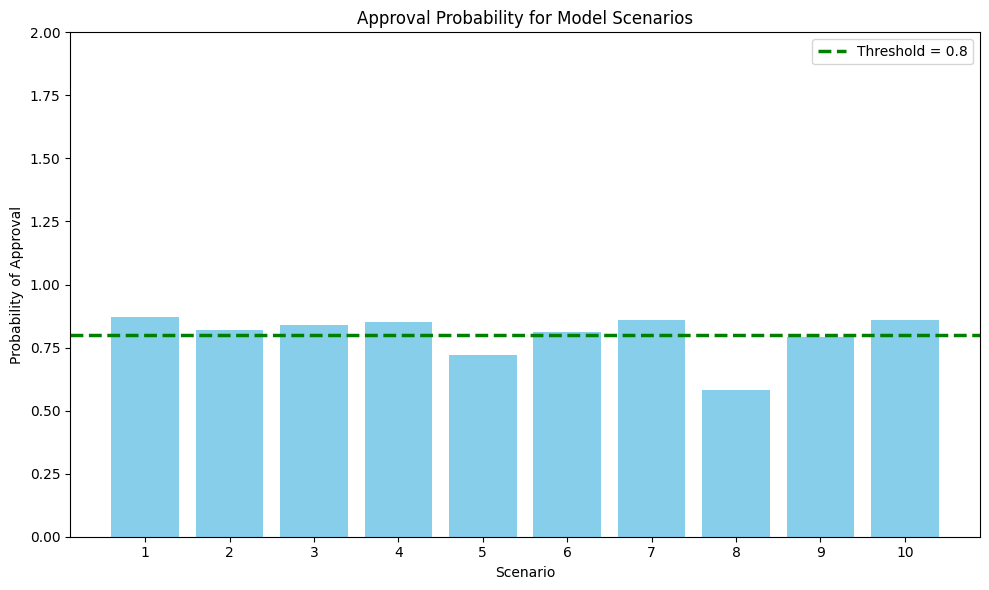

In [ ]:
# Define your 10 test scenarios below as new_applications DataFrame
# Testing with New Data - 10 scenarios
new_applications = pd.DataFrame([
    {
        'CODE_GENDER': 'F',
        'FLAG_OWN_CAR': 'Y',
        'FLAG_OWN_REALTY': 'N',
        'NAME_CONTRACT_TYPE_x': 'Cash loans',
        'NAME_FAMILY_STATUS': 'Married',
        'CNT_CHILDREN': 1,
        'AMT_INCOME_TOTAL': 100000,
        'AMT_CREDIT_x': 500000
    },
    {
        'CODE_GENDER': 'M',
        'FLAG_OWN_CAR': 'N',
        'FLAG_OWN_REALTY': 'Y',
        'NAME_CONTRACT_TYPE_x': 'Cash loans',
        'NAME_FAMILY_STATUS': 'Single / not married',
        'CNT_CHILDREN': 0,
        'AMT_INCOME_TOTAL': 75000,
        'AMT_CREDIT_x': 300000
    },
    {
        'CODE_GENDER': 'F',
        'FLAG_OWN_CAR': 'N',
        'FLAG_OWN_REALTY': 'Y',
        'NAME_CONTRACT_TYPE_x': 'Revolving loans',
        'NAME_FAMILY_STATUS': 'Civil marriage',
        'CNT_CHILDREN': 2,
        'AMT_INCOME_TOTAL': 85000,
        'AMT_CREDIT_x': 400000
    },
    {
        'CODE_GENDER': 'M',
        'FLAG_OWN_CAR': 'Y',
        'FLAG_OWN_REALTY': 'Y',
        'NAME_CONTRACT_TYPE_x': 'Cash loans',
        'NAME_FAMILY_STATUS': 'Married',
        'CNT_CHILDREN': 3,
        'AMT_INCOME_TOTAL': 120000,
        'AMT_CREDIT_x': 600000
    },
    {
        'CODE_GENDER': 'F',
        'FLAG_OWN_CAR': 'Y',
        'FLAG_OWN_REALTY': 'Y',
        'NAME_CONTRACT_TYPE_x': 'Revolving loans',
        'NAME_FAMILY_STATUS': 'Separated',
        'CNT_CHILDREN': 0,
        'AMT_INCOME_TOTAL': 55000,
        'AMT_CREDIT_x': 200000
    },
    {
        'CODE_GENDER': 'M',
        'FLAG_OWN_CAR': 'N',
        'FLAG_OWN_REALTY': 'N',
        'NAME_CONTRACT_TYPE_x': 'Cash loans',
        'NAME_FAMILY_STATUS': 'Widow',
        'CNT_CHILDREN': 1,
        'AMT_INCOME_TOTAL': 65000,
        'AMT_CREDIT_x': 250000
    },
    {
        'CODE_GENDER': 'F',
        'FLAG_OWN_CAR': 'N',
        'FLAG_OWN_REALTY': 'Y',
        'NAME_CONTRACT_TYPE_x': 'Cash loans',
        'NAME_FAMILY_STATUS': 'Single / not married',
        'CNT_CHILDREN': 0,
        'AMT_INCOME_TOTAL': 70000,
        'AMT_CREDIT_x': 320000
    },
    {
        'CODE_GENDER': 'M',
        'FLAG_OWN_CAR': 'N',
        'FLAG_OWN_REALTY': 'N',
        'NAME_CONTRACT_TYPE_x': 'Cash loans',
        'NAME_FAMILY_STATUS': 'Single / not married',
        'CNT_CHILDREN': 0,
        'AMT_INCOME_TOTAL': 30000,
        'AMT_CREDIT_x': 50000  
    },
    {
        'CODE_GENDER': 'F',
        'FLAG_OWN_CAR': 'N',
        'FLAG_OWN_REALTY': 'N',
        'NAME_CONTRACT_TYPE_x': 'Revolving loans',
        'NAME_FAMILY_STATUS': 'Separated',
        'CNT_CHILDREN': 0,
        'AMT_INCOME_TOTAL': 25000,
        'AMT_CREDIT_x': 150000 
    },
    {
        'CODE_GENDER': 'M',
        'FLAG_OWN_CAR': 'Y',
        'FLAG_OWN_REALTY': 'Y',
        'NAME_CONTRACT_TYPE_x': 'Cash loans',
        'NAME_FAMILY_STATUS': 'Married',
        'CNT_CHILDREN': 4,
        'AMT_INCOME_TOTAL': 40000,
        'AMT_CREDIT_x': 100000  
    }
])

# Preprocess new input: one-hot encode
new_applications_encoded = pd.get_dummies(new_applications)

# Align columns with training data
for col in X_train.columns:
    if col not in new_applications_encoded.columns:
        new_applications_encoded[col] = 0
new_applications_encoded = new_applications_encoded[X_train.columns]

# Predict probabilities
probs = model.predict_proba(new_applications_encoded)

# Find index of 'Approved'
approved_index = list(le.classes_).index('Approved')

# Set threshold
threshold = 0.80

# Print predictions with threshold
output_path = r'C:\Users\19564\Documents\CapstoneSR\RuizLoans\Data\prediction.txt'



with open(output_path, 'w') as f:
    for i, prob_array in enumerate(probs):
        approved_prob = prob_array[approved_index]
        decision = "Approved" if approved_prob >= threshold else "Not Approved"
        probs_str = ', '.join(f"{cls}: {prob:.2f}" for cls, prob in zip(le.classes_, prob_array))
        
        line1 = f"Scenario {i+1} probabilities: {{{probs_str}}}"
        line2 = f"Scenario {i+1} final decision based on threshold {threshold}: {decision}\n"
        
        print(line1)
        print(line2)
        
        f.write(line1 + '\n')
        f.write(line2 + '\n')
print(f"\n Predictions printed to txt file: {output_path}")


import matplotlib.pyplot as plt

# Get class labels
class_labels = le.classes_

# Extract approval probabilities for each scenario
approved_index = list(class_labels).index('Approved')
approved_probs = [prob[approved_index] for prob in probs]


plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), approved_probs, color='skyblue')
plt.axhline(y=threshold, color='green', linestyle='--', linewidth=2.5, label=f'Threshold = {threshold}')
plt.title('Approval Probability for Model Scenarios')
plt.xlabel('Scenario')
plt.ylabel('Probability of Approval')
plt.xticks(range(1, 11))
plt.ylim(0, 2)  # Extended y-axis range
plt.legend()
plt.tight_layout()
plt.savefig(r'C:\Users\19564\Documents\CapstoneSR\RuizLoans\scenario_approval_probs.png')
plt.show()


In [7]:
new_app_encoded = pd.get_dummies(new_applications)
for col in X_train.columns:
    if col not in new_app_encoded.columns:
        new_app_encoded[col] = 0
new_app_encoded = new_app_encoded[X_train.columns]
probs = model.predict_proba(new_app_encoded)
threshold = 0.80
approved_index = list(le.classes_).index('Approved')
for i, prob_array in enumerate(probs):
    approved_prob = prob_array[approved_index]
    decision = "Approved" if approved_prob >= threshold else "Not Approved"
    probs_str = ', '.join(f"{cls}: {prob:.2f}" for cls, prob in zip(le.classes_, prob_array))
    print(f"Scenario {i+1} probabilities: {{{probs_str}}}")
    print(f"Scenario {i+1} decision (threshold={threshold}): {decision}\n")

Scenario 1 probabilities: {Approved: 0.87, Canceled: 0.13}
Scenario 1 decision (threshold=0.8): Approved

Scenario 2 probabilities: {Approved: 0.82, Canceled: 0.18}
Scenario 2 decision (threshold=0.8): Approved

Scenario 3 probabilities: {Approved: 0.84, Canceled: 0.16}
Scenario 3 decision (threshold=0.8): Approved

Scenario 4 probabilities: {Approved: 0.85, Canceled: 0.15}
Scenario 4 decision (threshold=0.8): Approved

Scenario 5 probabilities: {Approved: 0.72, Canceled: 0.28}
Scenario 5 decision (threshold=0.8): Not Approved

Scenario 6 probabilities: {Approved: 0.81, Canceled: 0.19}
Scenario 6 decision (threshold=0.8): Approved

Scenario 7 probabilities: {Approved: 0.86, Canceled: 0.14}
Scenario 7 decision (threshold=0.8): Approved

Scenario 8 probabilities: {Approved: 0.58, Canceled: 0.42}
Scenario 8 decision (threshold=0.8): Not Approved

Scenario 9 probabilities: {Approved: 0.79, Canceled: 0.21}
Scenario 9 decision (threshold=0.8): Not Approved

Scenario 10 probabilities: {Approv

In [ ]:
approved_probs = [prob[approved_index] for prob in probs]
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), approved_probs, color='skyblue')
plt.axhline(y=threshold, color='green', linestyle='--', linewidth=2.5, label=f'Threshold = {threshold}')
plt.title('Approval Probability for Model Scenarios')
plt.xlabel('Scenario')
plt.ylabel('Probability of Approval')
plt.xticks(range(1, 11))
plt.ylim(0, 1.1)
plt.legend()
plt.tight_layout()
plt.show()

Intercept: 119957.35
Coefficient: -0.2164


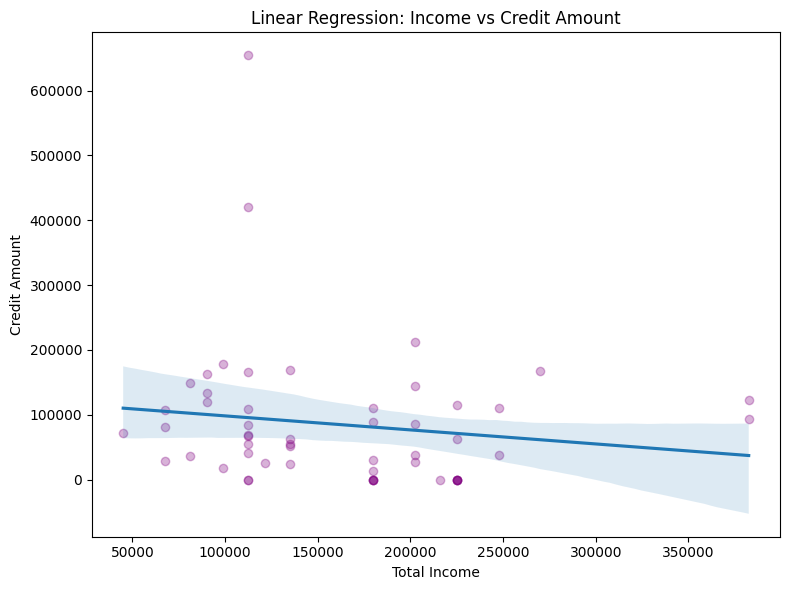

In [ ]:
#Linear Regression Income Total and Amt Credit
df_reg = df[['AMT_INCOME_TOTAL', 'AMT_CREDIT_x']].dropna()
X_reg = df_reg[['AMT_INCOME_TOTAL']]
y_reg = df_reg['AMT_CREDIT_x']
reg_model = LinearRegression()
reg_model.fit(X_reg, y_reg)
print(f"Intercept: {reg_model.intercept_:.2f}")
print(f"Coefficient: {reg_model.coef_[0]:.4f}")
plt.figure(figsize=(8, 6))
sns.regplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT_x', data=df_reg, scatter_kws={'alpha': 0.3, 'color': 'purple'})
plt.title('Linear Regression: Income vs Credit Amount')
plt.xlabel('Total Income')
plt.ylabel('Credit Amount')
plt.tight_layout()
plt.show()

For every additional 1 unit of income, the predicted credit amount decreases by about 0.22.

If income is measured in, say, dollars, then every extra $1 in income is associated with $0.22 less in credit.

This is a negative and weak relationship



Intercept: 0.9865
Coefficient: -0.000001
R-squared: 0.0495


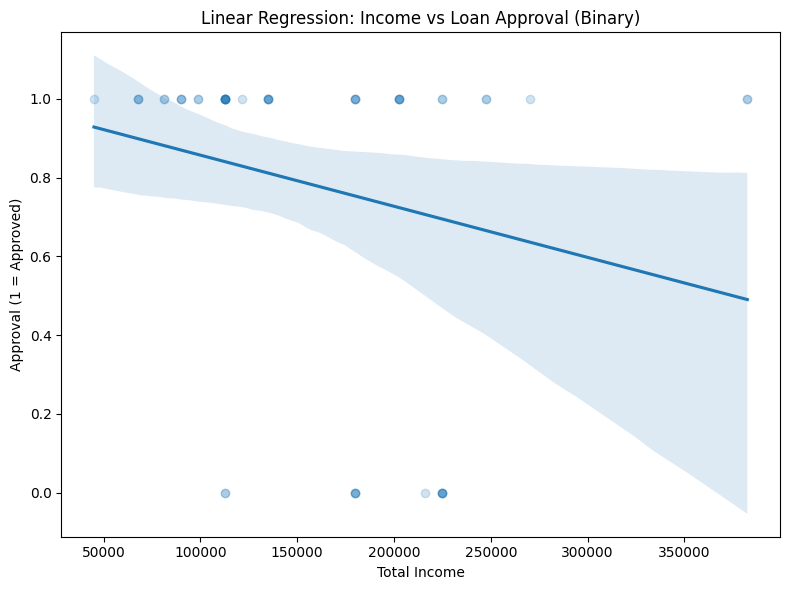

In [ ]:
# Linear Regression Amt Total and Loan Approval

import pandas as pd

data_path = r'C:\Users\19564\Documents\CapstoneSR\RuizLoans\Data\data_merged.csv'
df = pd.read_csv(data_path)

# Optional: filter as you did before
df = df[~df['NAME_CONTRACT_STATUS'].isin(['Refused', 'Unused offer'])]


df_bin = df[['AMT_INCOME_TOTAL', 'NAME_CONTRACT_STATUS']].dropna()
df_bin['APPROVED_FLAG'] = (df_bin['NAME_CONTRACT_STATUS'] == 'Approved').astype(int)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

X = df_bin[['AMT_INCOME_TOTAL']]
y = df_bin['APPROVED_FLAG']

reg_model = LinearRegression()
reg_model.fit(X, y)

print(f"Intercept: {reg_model.intercept_:.4f}")
print(f"Coefficient: {reg_model.coef_[0]:.6f}")

# R-squared
y_pred = reg_model.predict(X)
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2:.4f}")

plt.figure(figsize=(8, 6))
sns.regplot(x='AMT_INCOME_TOTAL', y='APPROVED_FLAG', data=df_bin, scatter_kws={'alpha': 0.2})
plt.title('Linear Regression: Income vs Loan Approval')
plt.xlabel('Total Income')
plt.ylabel('Approval (1 = Approved)')
plt.tight_layout()
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.89      0.94         9

    accuracy                           0.91        11
   macro avg       0.83      0.94      0.87        11
weighted avg       0.94      0.91      0.92        11

Confusion Matrix:
[[2 0]
 [1 8]]
ROC AUC Score: 1.0000


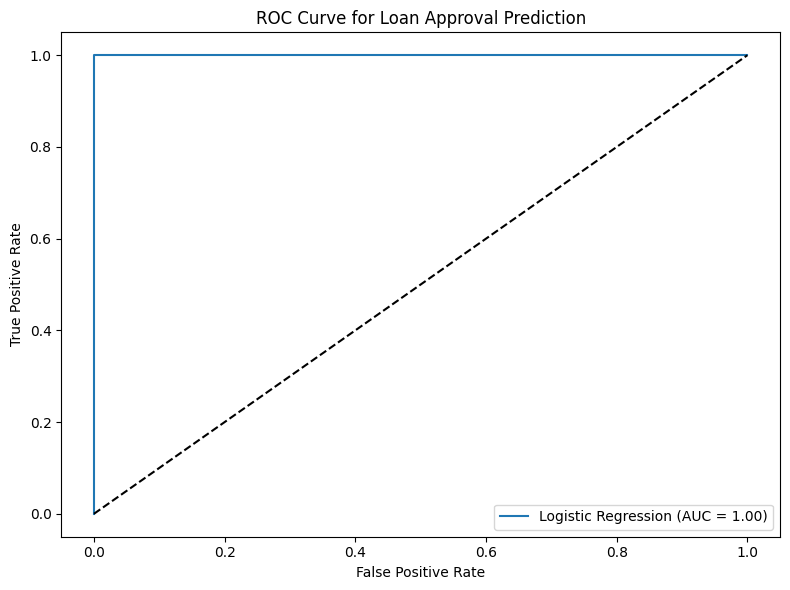


Logistic Regression Coefficients:
                                   Feature   Coefficient
1                             AMT_CREDIT_x  1.582628e-03
4  NAME_FAMILY_STATUS_Single / not married  1.115808e-08
2               NAME_FAMILY_STATUS_Married  4.716680e-09
3             NAME_FAMILY_STATUS_Separated -5.312455e-09
5                 NAME_FAMILY_STATUS_Widow -2.399736e-08
0                         AMT_INCOME_TOTAL -1.398266e-04


In [7]:
# Logistic Regression:

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean data
data_path = r'C:\Users\19564\Documents\CapstoneSR\RuizLoans\Data\data_merged.csv'
df = pd.read_csv(data_path)
df = df[~df['NAME_CONTRACT_STATUS'].isin(['Refused', 'Unused offer'])]
df = df.dropna(subset=['NAME_CONTRACT_STATUS', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'NAME_FAMILY_STATUS'])

# Create binary target
df['APPROVED_FLAG'] = (df['NAME_CONTRACT_STATUS'] == 'Approved').astype(int)

# Select features and target
X = df[['AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'NAME_FAMILY_STATUS']]
y = df['APPROVED_FLAG']

# One-hot encode categorical variable
X = pd.get_dummies(X, columns=['NAME_FAMILY_STATUS'], drop_first=True)

# Split train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train logistic regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predict on test set
y_pred = log_model.predict(X_test)
y_probs = log_model.predict_proba(X_test)[:, 1]

# Evaluation reports
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Loan Approval Prediction')
plt.legend()
plt.tight_layout()
plt.show()

# Display model coefficients for interpretation
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nLogistic Regression Coefficients:")
print(coef_df)







91% accuracy

True Negatives (2): Correctly predicted Not Approved

False Positives (0): None — perfect precision on class 0

False Negatives (1): One Approved case was predicted as Not Approved

True Positives (8): Correctly predicted Approved

Correlation Matrix:
                  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x
CNT_CHILDREN          1.000000         -0.056023      0.276108
AMT_INCOME_TOTAL     -0.056023          1.000000     -0.142754
AMT_CREDIT_x          0.276108         -0.142754      1.000000


<Figure size 1000x800 with 0 Axes>

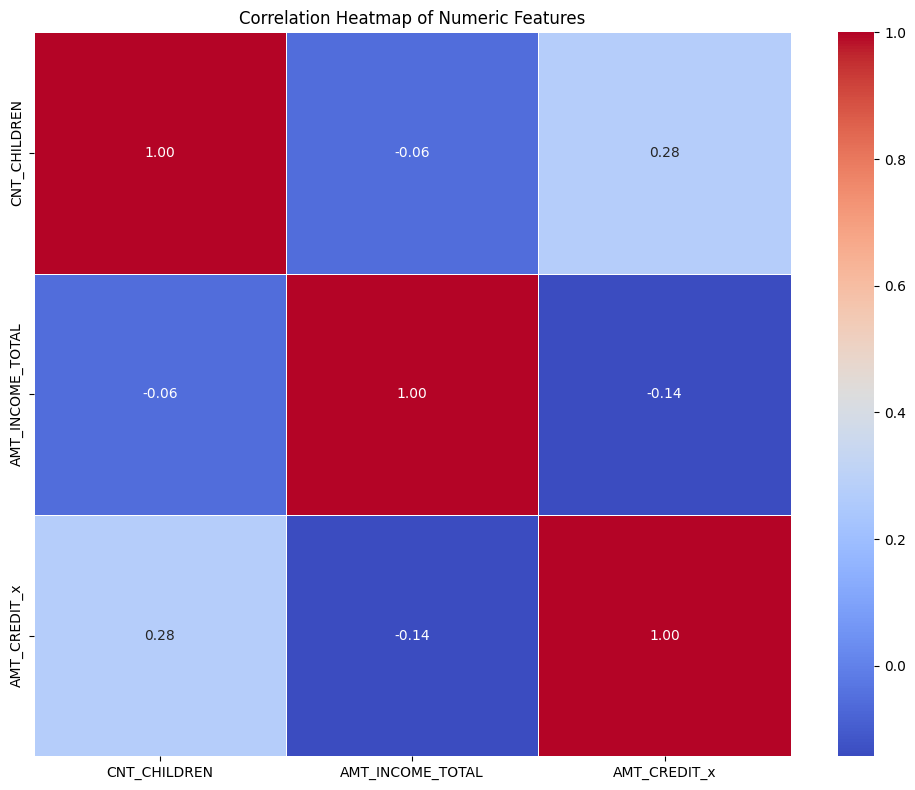

In [1]:
#HeatMap
# Heatmap of Numeric Feature Correlations

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data_path = r'C:\Users\19564\Documents\CapstoneSR\RuizLoans\Data\data_merged.csv'
df = pd.read_csv(data_path)

features = [
    'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'NAME_CONTRACT_TYPE_x', 'NAME_FAMILY_STATUS',
    'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x'
]

df = df[~df['NAME_CONTRACT_STATUS'].isin(['Refused', 'Unused offer'])]
df = df.dropna(subset=['NAME_CONTRACT_STATUS'] + features)




plt.figure(figsize=(10, 8))

# Compute correlation matrix only for numeric columns
numeric_corr = df[features].select_dtypes(include=[np.number]).corr()

print("Correlation Matrix:")
print(numeric_corr)



plt.figure(figsize=(10, 8))
sns.heatmap(numeric_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()

# Save BEFORE showing
plt.savefig(r'C:\Users\19564\Documents\CapstoneSR\RuizLoans\correlation_heatmap.png')

# Now show it
plt.show()



#children is not a significant factor

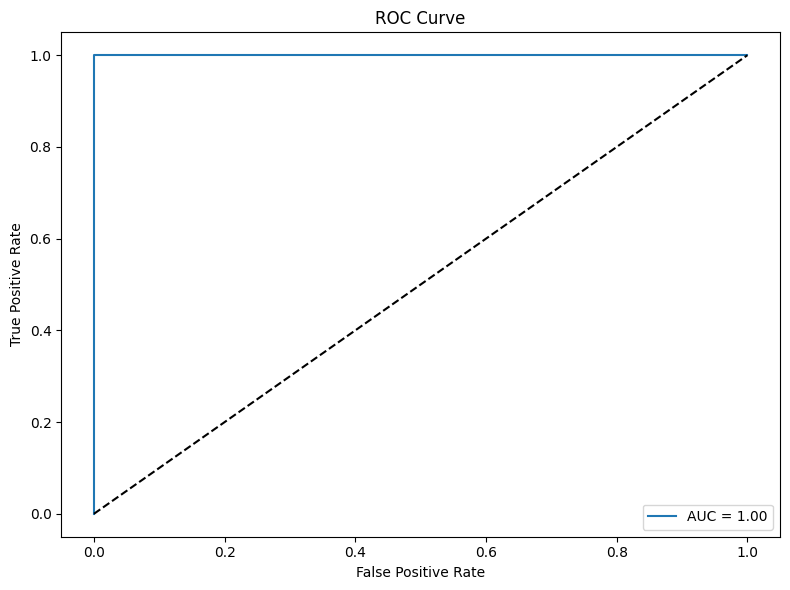

In [10]:
if len(le.classes_) == 2:
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [11]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_log_pred = log_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_log_pred, target_names=le.classes_))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    Approved       1.00      1.00      1.00         9
    Canceled       1.00      1.00      1.00         2

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

